In [1]:
%matplotlib inline


# Finding Local Peaks in Solar Data


Detección de picos de intensidades en imágenes solares.



In [2]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from skimage.feature import peak_local_max

import sunpy.map
from sunpy.data.sample import AIA_193_IMAGE

Se usará un sample de sunpy


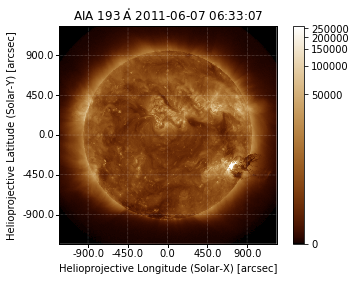

In [4]:
aiamap = sunpy.map.Map(AIA_193_IMAGE)
plt.figure()
aiamap.plot()
plt.colorbar()

In [5]:
x = np.arange(aiamap.data.shape[0])
y = np.arange(aiamap.data.shape[1])
X, Y = np.meshgrid(x, y)

print (X)
print (Y)

print x
print y

[[   0    1    2 ... 1021 1022 1023]
 [   0    1    2 ... 1021 1022 1023]
 [   0    1    2 ... 1021 1022 1023]
 ...
 [   0    1    2 ... 1021 1022 1023]
 [   0    1    2 ... 1021 1022 1023]
 [   0    1    2 ... 1021 1022 1023]]
[[   0    0    0 ...    0    0    0]
 [   1    1    1 ...    1    1    1]
 [   2    2    2 ...    2    2    2]
 ...
 [1021 1021 1021 ... 1021 1021 1021]
 [1022 1022 1022 ... 1022 1022 1022]
 [1023 1023 1023 ... 1023 1023 1023]]
[   0    1    2 ... 1021 1022 1023]
[   0    1    2 ... 1021 1022 1023]


La variable coordinates contendrá las coordenas en la imagen de los picos que cumplan el umbral (threshold_rel * maxIntensidad). Se puede definir la distancia mínima, en pixeles, para separar un pico de intensidad con otro.



In [6]:
coordinates = peak_local_max(aiamap.data, min_distance=200, threshold_rel=0.2)

Se plotea en 3D la imagen.



[125968.  91572. 260644.]
[[629 735]
 [582 460]
 [365 808]]
260644.0


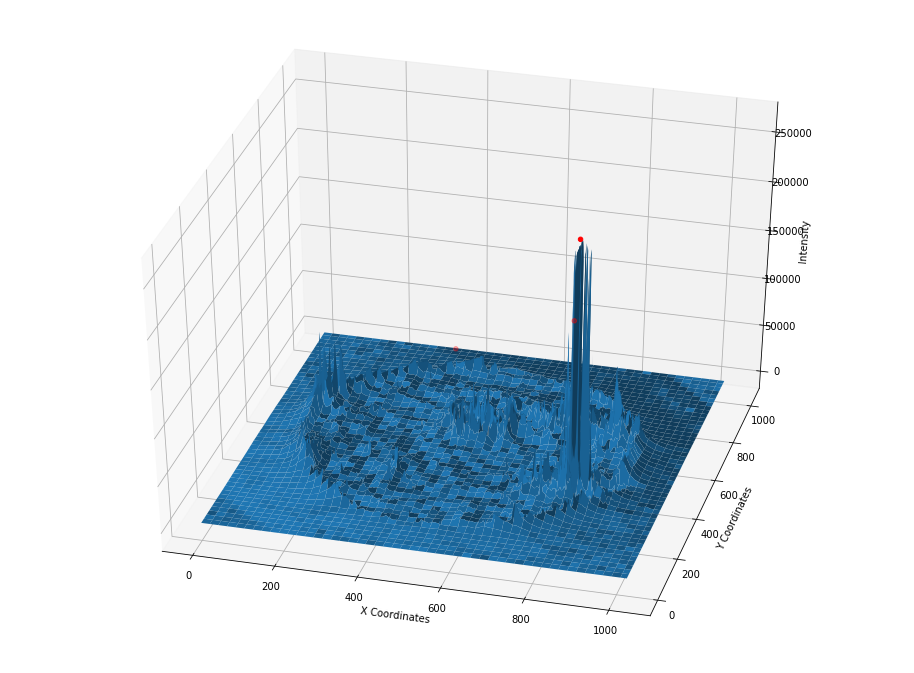

In [8]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, aiamap.data)
ax.view_init(elev=38, azim=285)
peaks_pos = aiamap.data[coordinates[:, 0], coordinates[:, 1]]
print peaks_pos
print coordinates
ax.scatter(coordinates[:, 1], coordinates[:, 0], peaks_pos, color='r')
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')
ax.set_zlabel('Intensity')

print (aiamap.data[365, 808])

In [9]:
hpc_max = aiamap.pixel_to_world(coordinates[:, 1]*u.pixel, coordinates[:, 0]*u.pixel)
print(hpc_max)

<SkyCoord (Helioprojective: obstime=2011-06-07 06:33:07.840000, rsun=696000000.0 m, observer=<HeliographicStonyhurst Coordinate (obstime=2011-06-07 06:33:07.840000): (lon, lat, radius) in (deg, deg, m)
    (0., 0.048602, 1.51846027e+11)>): (Tx, Ty) in arcsec
    [( 539.61497706,  283.31364268), (-121.10595628,  169.7209177 ),
     ( 715.65988791, -350.91002278)]>


Se marca con una equis azul los puntos de alta intensidad.



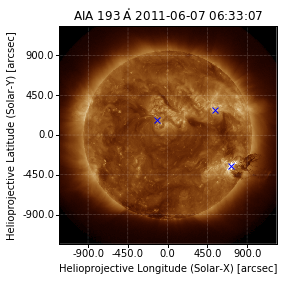

In [10]:
fig = plt.figure()
ax = plt.subplot(projection=aiamap)
aiamap.plot()
ax.plot_coord(hpc_max, 'bx')
plt.show()